# DATA200S Final Project - EDA Notebook

In [ ]:
from google.colab import drive
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive') # comment out if not on colab!

Mounted at /content/drive


In [ ]:
!ls "drive/MyDrive"

 answers-assignment2.gdoc		    'Untitled document (2).gdoc'
 Bcnonnected.gdoc			    'Untitled document (3).gdoc'
 cleaned_data_5_percent.json		    'Untitled document (4).gdoc'
 cleaned_data.json			    'Untitled document (5).gdoc'
 endomondoMeta.json			    'Untitled document (6).gdoc'
'interview prep.gdoc'			    'Untitled document (7).gdoc'
'jeffrey updated resume - Google Docs.pdf'  'Untitled document (8).gdoc'
 SEC.pdf				    'Untitled document.gdoc'
'Untitled document (1).gdoc'


Data uses single quotes instead of double quotes, therefore cannot be parsed as JSON. Therefore, here I read in each row as a literal and store it in an array. This array is then used to create a dataframe. This process takes ~30 mins and 30gb of RAM!

In [ ]:
meta_rows = []
# with open("drive/MyDrive/endomondoMeta.json", "r") as table:
with open("../data/endomondoMeta.json", "r") as table: # THIS IS NOT PRESENT IN THE ZIP FILE, TOO BIG !!!
    for row in table:
        row = ast.literal_eval(row)
        meta_rows.append(row)

meta = pd.DataFrame(meta_rows)

In [ ]:
meta

,userId,hydration,sport,ascent,descent,calories,duration,id,timestamp,distance,url,weather,gender
0,10014612,NaN,mountain bike,147.0,137.0,1313.0,3218.35,322483826,"[2014-04-11T14:32:35.000Z, 2014-04-11T14:32:40...",18.855510,https://www.endomondo.com/users/10014612/worko...,{'type': 7},male
1,10014612,NaN,mountain bike,97.0,84.0,724.0,1728.33,322483840,"[2014-04-10T14:56:01.000Z, 2014-04-10T14:56:05...",10.912310,https://www.endomondo.com/users/10014612/worko...,{'type': 7},male
2,10014612,NaN,mountain bike,82.0,94.0,424.0,1904.69,322483848,"[2014-04-07T17:18:13.000Z, 2014-04-07T17:18:14...",10.763090,https://www.endomondo.com/users/10014612/worko...,{'type': 6},male
3,10014612,NaN,mountain bike,263.0,274.0,2732.0,7218.46,322483865,"[2014-03-30T14:01:32.000Z, 2014-03-30T14:01:48...",38.315790,https://www.endomondo.com/users/10014612/worko...,{'type': 1},male
4,10014612,NaN,mountain bike,132.0,135.0,1301.0,3208.09,322483880,"[2014-03-28T16:06:04.000Z, 2014-03-28T16:06:11...",18.713600,https://www.endomondo.com/users/10014612/worko...,{'type': 1},male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
962185,9991401,0.189160,run,10.7,95.4,352.0,1462.00,189346596,"[2013-05-13T18:19:04.000Z, 2013-05-13T18:19:14...",3.913213,https://www.endomondo.com/users/9991401/workou...,{'type': 33},male
962186,9991401,0.177107,run,0.0,12.3,329.0,1454.00,188759390,"[2013-05-12T12:14:35.000Z, 2013-05-12T12:14:54...",3.838417,https://www.endomondo.com/users/9991401/workou...,{'type': 14},male
962187,9991401,0.136014,run,12.0,25.9,247.0,1327.00,187809211,"[2013-05-10T05:03:59.000Z, 2013-05-10T05:04:07...",2.878297,https://www.endomondo.com/users/9991401/workou...,{'type': 1},male
962188,9991401,0.000107,run,0.0,0.0,NaN,4.00,186879318,[2013-05-08T04:44:44.000Z],0.000000,https://www.endomondo.com/users/9991401/workou...,{'type': 11},male


Check which columns have NaN values

In [ ]:
columns_with_nan = meta.columns[meta.isnull().any()].tolist()
columns_with_nan

['hydration',
 'ascent',
 'descent',
 'calories',
 'duration',
 'distance',
 'weather']

Check the number of invalid entries in each column

In [ ]:
print(meta.isnull().sum())


userId            0
hydration    680448
sport             0
ascent        66352
descent       66398
calories       5041
duration          8
id                0
timestamp         0
distance       7406
url               0
weather      291924
gender            0
dtype: int64


Check how many sports are in the dataset

In [ ]:
num_sports = meta["sport"].nunique()
num_sports


61

Get the top 10 most common sports

In [ ]:
top10_sports = meta.groupby("sport")["sport"].count().sort_values(ascending=False).head(10)
top10_sports

sport
run                        347558
bike                       252401
walk                       100362
bike (transport)            98596
mountain bike               41778
indoor cycling              21878
weight training             17673
swimming                    14272
core stability training      6940
hiking                       6722
Name: sport, dtype: int64

Get the 10 least common sports

In [ ]:
bottom10_sports = meta.groupby("sport")["sport"].count().sort_values(ascending=False).tail(10)
bottom10_sports


sport
beach volleyball    25
volleyball          25
wheelchair          16
rugby               11
handball             4
fencing              4
cricket              3
polo                 2
walk (transport)     2
weight lifting       1
Name: sport, dtype: int64

Plot the distribution of the different kinds of sports

Text(0, 0.5, 'Count')

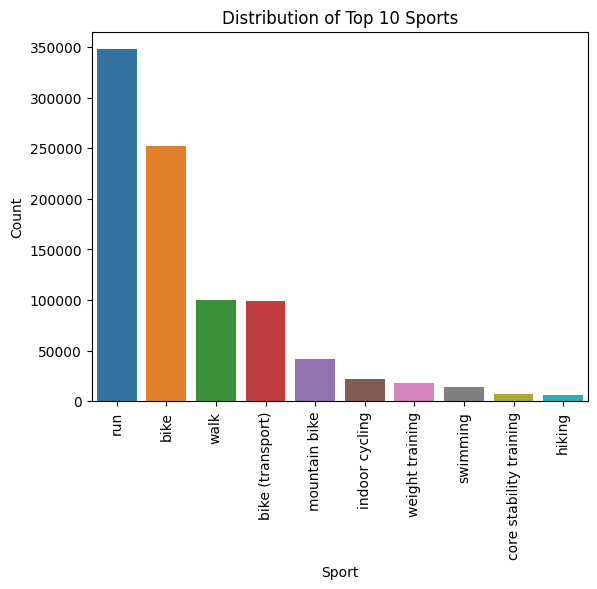

In [ ]:
sports_distr = sns.barplot(x=top10_sports.index, y=top10_sports.values)
sports_distr.set_xticklabels(sports_distr.get_xticklabels(), rotation=90)
plt.title("Distribution of Top 10 Sports")
plt.xlabel("Sport")
plt.ylabel("Count")

Look at the proportion of each sport to the total number of entries

In [ ]:
meta.groupby("sport").agg(lambda sf: sf.count() / len(meta))["id"].sort_values(ascending=False)



sport
run                 0.361216
bike                0.262319
walk                0.104306
bike (transport)    0.102470
mountain bike       0.043420
                      ...   
fencing             0.000004
cricket             0.000003
polo                0.000002
walk (transport)    0.000002
weight lifting      0.000001
Name: id, Length: 61, dtype: float64

Look at the gender disparity in the dataset

In [ ]:
meta.groupby("gender").count()

,userId,hydration,sport,ascent,descent,calories,duration,id,timestamp,distance,url,weather
gender,,,,,,,,,,,,
female,96792,47741,96792,87812,87796,96254,96790,96792,96792,95855,96792,72556
male,857744,231992,857744,801403,801373,853350,857738,857744,857744,851353,857744,593465
unknown,7654,2009,7654,6623,6623,7545,7654,7654,7654,7576,7654,4245


Here, we read in the HR data, which is MASSIVE due to all the metrics it contains, such as speed and altitude. Here we look at the first 10 entries

In [ ]:
# with open("drive/MyDrive/endomondoHR.json", "r") as table:
with open("../data/endomondoHR.json", "r") as table: # THIS IS NOT PRESENT IN THE ZIP FILE, TOO BIG !!!
    i = 0
    for row in table:
        row = ast.literal_eval(row)
        if i > 10:
            break
        print(row)
        i += 1


{'speed': [6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 31.8096, 24.39, 23.346, 26.2368, 28.4868, 28.4868, 27.6624, 24.8688, 25.794, 14.0868, 23.346, 26.4168, 31.8096, 32.1084, 32.274, 30.9672, 29.0016, 27.5436, 34.6464, 31.6404, 30.3696, 26.4816, 26.8128, 26.172, 24.1956, 33.9804, 29.4048, 21.2112, 19.4328, 27.3456, 29.6784, 33.5988, 23.4864, 21.7512, 29.7936, 31.1256, 32.58, 32.8608, 30.0276, 28.5192, 29.7324, 21.0744, 19.8756, 19.7712, 19.1304, 18.486, 23.3892, 25.6068, 27.5364, 25.83, 29.8764, 23.2416, 19.3788, 17.892, 16.2864, 15.0408, 14.6952, 15.192, 14.7816, 18.918, 25.83, 30.204, 35.8488, 41.2632, 43.1172, 43.5888, 41.9328, 31.1544, 25.3296, 25.3044, 27.828, 21.7836, 21.006, 23.2596, 31.7556, 13.7628, 17.5536, 20.9088, 19.7748, 18.7128, 22.914, 31.4928, 32.3676, 33.498, 21.762, 21.3984, 18.9612, 13.7772, 13.9788, 13.608, 13.4856, 13.4856, 19.836, 38.2824, 21.8124, 20.196, 21.2544, 34.0128, 38.4588, 29.2104, 45.018, 43.236, 29.0988, 20.7396, 21.9924, 18.396, 15.912, 10.44, 13.19

Reading in the entire dataset into a pd.DF would take a long time (hours) so instead for now we look at the top 10,000 entries, specifically the workout ID and the heart rate arrays.

In [ ]:
hr_rows = []
keys = ["heart_rate", "id"]
i = 0
# with open("drive/MyDrive/endomondoHR.json", "r") as table:
with open("../data/endomondoHR.json", "r") as table: # THIS IS NOT PRESENT IN THE ZIP FILE, TOO BIG !!!
    for row in table:
        row = ast.literal_eval(row)
        extracted_row = {key: row[key] for key in keys if key in row}
        hr_rows.append(extracted_row)
        i += 1
        if i > 10000:
            break

hr = pd.DataFrame(hr_rows)

In [ ]:
hr

,heart_rate,id
0,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535
1,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038
2,"[99, 105, 113, 110, 109, 110, 108, 121, 116, 1...",389643739
3,"[99, 105, 113, 109, 112, 116, 116, 114, 114, 1...",386729739
4,"[110, 113, 114, 116, 123, 126, 129, 135, 137, ...",383186560
...,...,...
9996,"[104, 104, 105, 107, 115, 121, 125, 129, 135, ...",391904784
9997,"[71, 71, 71, 76, 81, 87, 95, 100, 105, 112, 11...",391904801
9998,"[68, 72, 77, 84, 90, 96, 102, 107, 112, 118, 1...",391904818
9999,"[121, 121, 124, 125, 129, 132, 135, 138, 142, ...",391025164


Merge the heart rate data with the meta dataframe on the workout id

In [ ]:
meta_with_hr = meta.merge(hr, on="id")
meta_with_hr


,userId,hydration,sport,ascent,descent,calories,duration,id,timestamp,distance,url,weather,gender,heart_rate
0,10057948,NaN,run,35.0,39.0,290.0000,2055.569,650275494,"[2015-12-19T13:53:50.000Z, 2015-12-19T13:53:53...",3.90636,https://www.endomondo.com/users/10057948/worko...,{'type': 7},male,"[87, 90, 92, 92, 99, 99, 102, 102, 102, 109, 1..."
1,10057948,NaN,bike,88.0,88.0,0.0000,3525.000,628648767,"[2015-11-05T21:20:11.000Z, 2015-11-05T21:20:18...",22.39755,https://www.endomondo.com/users/10057948/worko...,None,male,"[90, 93, 92, 91, 97, 95, 96, 97, 98, 97, 99, 1..."
2,10057948,NaN,bike,344.0,355.0,685.0000,5875.821,617014137,"[2015-10-11T12:43:59.000Z, 2015-10-11T12:44:33...",36.73035,https://www.endomondo.com/users/10057948/worko...,{'type': 4},male,"[65, 83, 85, 85, 75, 83, 75, 68, 76, 84, 92, 9..."
3,10057948,NaN,bike,392.0,378.0,677.0000,4986.544,612513349,"[2015-10-03T14:04:24.000Z, 2015-10-03T14:07:51...",39.90147,https://www.endomondo.com/users/10057948/worko...,None,male,"[80, 106, 121, 122, 116, 121, 133, 137, 134, 1..."
4,10057948,NaN,run,28.0,29.0,324.0000,2569.248,606775044,"[2015-09-23T10:30:36.000Z, 2015-09-23T10:30:37...",3.13272,https://www.endomondo.com/users/10057948/worko...,None,male,"[71, 74, 74, 77, 79, 80, 84, 92, 95, 95, 100, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,982359,NaN,mountain bike,476.0,476.0,1637.5600,5548.000,117437355,"[2013-01-06T09:29:22.000Z, 2013-01-06T09:34:18...",23.36000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 100, 'wind_direction':...",male,"[89, 106, 101, 117, 125, 133, 130, 142, 149, 1..."
9997,982359,NaN,bike (transport),42.0,33.0,142.1930,760.000,117437436,"[2013-01-06T09:06:35.000Z, 2013-01-06T09:06:36...",4.34000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 100, 'wind_direction':...",male,"[87, 88, 93, 93, 96, 97, 99, 100, 101, 100, 98..."
9998,982359,NaN,elliptical,2.0,5.0,196.1910,785.000,116934249,"[2013-01-04T19:48:32.000Z, 2013-01-04T19:48:33...",3.40000,https://www.endomondo.com/users/982359/workout...,"{'type': 11, 'humidity': 100, 'wind_direction'...",male,"[78, 79, 80, 84, 85, 86, 86, 87, 88, 91, 94, 9..."
9999,982359,NaN,bike,80.0,80.0,733.7720,2486.000,116459008,"[2013-01-02T19:29:36.000Z, 2013-01-02T19:31:35...",18.99000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 93, 'wind_direction': ...",male,"[75, 78, 80, 86, 97, 101, 105, 109, 111, 116, ..."


Since heart rate is currently represented as a list of values, it may be difficult to analyze since they can be different sizes based on the exercise. Therefore, we calculate an average heart rate for each workout.

In [ ]:
meta_with_hr["mean_hr"] = meta_with_hr["heart_rate"].apply(np.mean)
meta_with_hr

,userId,hydration,sport,ascent,descent,calories,duration,id,timestamp,distance,url,weather,gender,heart_rate,mean_hr
0,10057948,NaN,run,35.0,39.0,290.0000,2055.569,650275494,"[2015-12-19T13:53:50.000Z, 2015-12-19T13:53:53...",3.90636,https://www.endomondo.com/users/10057948/worko...,{'type': 7},male,"[87, 90, 92, 92, 99, 99, 102, 102, 102, 109, 1...",133.750000
1,10057948,NaN,bike,88.0,88.0,0.0000,3525.000,628648767,"[2015-11-05T21:20:11.000Z, 2015-11-05T21:20:18...",22.39755,https://www.endomondo.com/users/10057948/worko...,None,male,"[90, 93, 92, 91, 97, 95, 96, 97, 98, 97, 99, 1...",119.832000
2,10057948,NaN,bike,344.0,355.0,685.0000,5875.821,617014137,"[2015-10-11T12:43:59.000Z, 2015-10-11T12:44:33...",36.73035,https://www.endomondo.com/users/10057948/worko...,{'type': 4},male,"[65, 83, 85, 85, 75, 83, 75, 68, 76, 84, 92, 9...",117.498000
3,10057948,NaN,bike,392.0,378.0,677.0000,4986.544,612513349,"[2015-10-03T14:04:24.000Z, 2015-10-03T14:07:51...",39.90147,https://www.endomondo.com/users/10057948/worko...,None,male,"[80, 106, 121, 122, 116, 121, 133, 137, 134, 1...",143.536000
4,10057948,NaN,run,28.0,29.0,324.0000,2569.248,606775044,"[2015-09-23T10:30:36.000Z, 2015-09-23T10:30:37...",3.13272,https://www.endomondo.com/users/10057948/worko...,None,male,"[71, 74, 74, 77, 79, 80, 84, 92, 95, 95, 100, ...",121.392000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,982359,NaN,mountain bike,476.0,476.0,1637.5600,5548.000,117437355,"[2013-01-06T09:29:22.000Z, 2013-01-06T09:34:18...",23.36000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 100, 'wind_direction':...",male,"[89, 106, 101, 117, 125, 133, 130, 142, 149, 1...",162.496000
9997,982359,NaN,bike (transport),42.0,33.0,142.1930,760.000,117437436,"[2013-01-06T09:06:35.000Z, 2013-01-06T09:06:36...",4.34000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 100, 'wind_direction':...",male,"[87, 88, 93, 93, 96, 97, 99, 100, 101, 100, 98...",119.658000
9998,982359,NaN,elliptical,2.0,5.0,196.1910,785.000,116934249,"[2013-01-04T19:48:32.000Z, 2013-01-04T19:48:33...",3.40000,https://www.endomondo.com/users/982359/workout...,"{'type': 11, 'humidity': 100, 'wind_direction'...",male,"[78, 79, 80, 84, 85, 86, 86, 87, 88, 91, 94, 9...",145.300000
9999,982359,NaN,bike,80.0,80.0,733.7720,2486.000,116459008,"[2013-01-02T19:29:36.000Z, 2013-01-02T19:31:35...",18.99000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 93, 'wind_direction': ...",male,"[75, 78, 80, 86, 97, 101, 105, 109, 111, 116, ...",153.402000


In [ ]:
# save to csv for future use
# meta_with_hr.to_csv("../data/meta_with_hr.csv")

We take the top 3 sports from before and generate violin plots to analyze the distrubition of mean heart rates for each.

Text(0, 0.5, 'Mean Heart Rate')

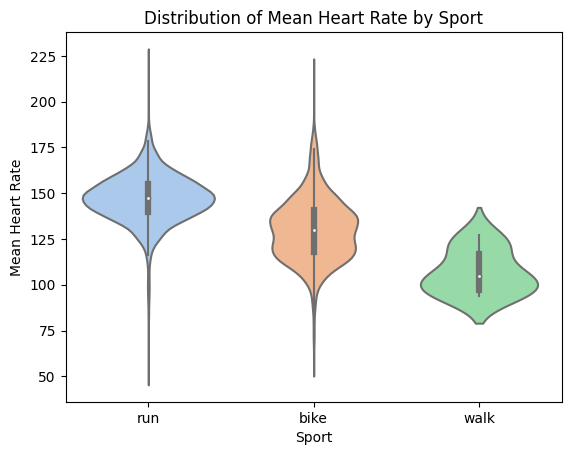

In [ ]:
top_3_sports = ["run", "bike", "walk"]

meta_with_hr_top3 = meta_with_hr[meta_with_hr["sport"].isin(top_3_sports)]

sns.violinplot(data=meta_with_hr_top3, x='sport', y='mean_hr', palette='pastel')
plt.title("Distribution of Mean Heart Rate by Sport")
plt.xlabel("Sport")
plt.ylabel("Mean Heart Rate")

Next, we want to look at the correlation between the number of workouts that a user has and their average heart rate.

In [ ]:
user_workouts = meta_with_hr.groupby("userId")["id"].count()
user_workouts = pd.merge(meta_with_hr, user_workouts, on='userId', how='left').rename({"id_y" : "num_workouts"}, axis=1)
user_workouts = user_workouts.groupby("userId")["mean_hr", "num_workouts"].mean()
user_workouts




<ipython-input-83-80c24bdd699f>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user_workouts = user_workouts.groupby("userId")["mean_hr", "num_workouts"].mean()


,mean_hr,num_workouts
userId,,
16786,142.797138,306.0
22260,149.952177,90.0
196571,139.774522,638.0
279317,132.861754,90.0
338866,137.195035,125.0
430859,116.732455,228.0
519257,172.797336,66.0
732008,149.392425,166.0
854368,149.734654,97.0


Text(0, 0.5, 'Mean Heart Rate')

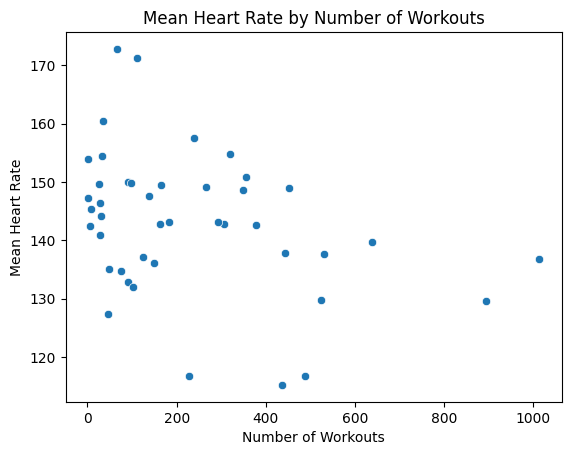

In [ ]:
sns.scatterplot(data=user_workouts, x="num_workouts", y="mean_hr")
plt.title("Mean Heart Rate by Number of Workouts")
plt.xlabel("Number of Workouts")
plt.ylabel("Mean Heart Rate")


In [ ]:
correlation_matrix = np.corrcoef(user_workouts["num_workouts"], user_workouts["mean_hr"])
correlation_matrix

array([[ 1.        , -0.34961852],
       [-0.34961852,  1.        ]])

As shown by the plot and the correlation coefficient, there is a slight negative correlation between the two variables. Next we try transforming according to the Tukey-Mosteller bulge diagram.

Text(0, 0.5, 'Root Mean Heart Rate')

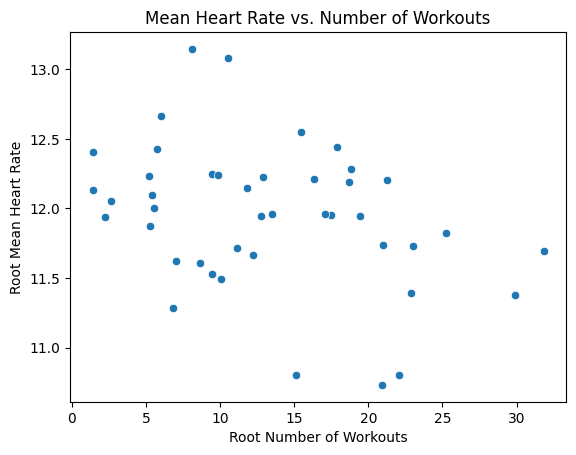

In [ ]:
sns.scatterplot(data=user_workouts, x=np.sqrt(user_workouts["num_workouts"]), y=np.sqrt(user_workouts["mean_hr"]))
plt.title("Mean Heart Rate vs. Number of Workouts")
plt.xlabel("Root Number of Workouts")
plt.ylabel("Root Mean Heart Rate")

Next we will look at the correlation between the number of calories burned during a workout and the average heart rate for that workout. First we look at the calories column to make sure the values are valid.

In [ ]:
meta_with_hr[meta_with_hr["calories"] < 0]


,userId,hydration,sport,ascent,descent,calories,duration,id,timestamp,distance,url,weather,gender,heart_rate,mean_hr
6967,4997910,NaN,mountain bike,251.0,257.0,-163.672,5653.0,397056186,"[2014-08-23T05:49:08.000Z, 2014-08-23T05:49:19...",21.76,https://www.endomondo.com/users/4997910/workou...,{'type': 1},male,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",36.712
7400,4997910,NaN,bike (transport),297.0,148.0,-127.727,2521.0,174718923,"[2013-03-28T14:56:53.000Z, 2013-03-28T14:56:58...",14.48,https://www.endomondo.com/users/4997910/workou...,{'type': 3},male,"[0, 0, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,...",77.336


As shown above, there are some negative calorie values, which doesn't make a ton of sense. We will ignore these in any analysis. Let's check if there are any 0 calorie workouts

In [ ]:
meta_with_hr[meta_with_hr["calories"] <= 0]

,userId,hydration,sport,ascent,descent,calories,duration,id,timestamp,distance,url,weather,gender,heart_rate,mean_hr
1,10057948,NaN,bike,88.0,88.0,0.0,3525.000,628648767,"[2015-11-05T21:20:11.000Z, 2015-11-05T21:20:18...",22.39755,https://www.endomondo.com/users/10057948/worko...,None,male,"[90, 93, 92, 91, 97, 95, 96, 97, 98, 97, 99, 1...",119.832000
78,10057948,NaN,bike,0.0,0.0,0.0,1.196,532638452,"[2015-05-26T10:22:11.000Z, 2015-05-26T10:22:12...",0.00000,https://www.endomondo.com/users/10057948/worko...,None,male,"[74, 74]",74.000000
79,10057948,NaN,bike,0.0,0.0,0.0,1.100,528938337,"[2015-05-24T14:50:17.000Z, 2015-05-24T14:50:18...",0.00000,https://www.endomondo.com/users/10057948/worko...,{'type': 4},male,"[94, 92]",93.000000
144,10057948,NaN,bike,25.0,46.0,0.0,1531.495,436386069,"[2014-10-27T10:54:26.000Z, 2014-10-27T10:54:27...",8.10654,https://www.endomondo.com/users/10057948/worko...,{'type': 7},male,"[68, 68, 67, 68, 69, 71, 72, 74, 75, 76, 77, 7...",106.867735
145,10057948,NaN,bike,183.0,183.0,0.0,3642.632,429756048,"[2014-10-26T14:09:21.000Z, 2014-10-26T14:09:25...",21.15900,https://www.endomondo.com/users/10057948/worko...,None,male,"[98, 94, 102, 89, 97, 100, 96, 103, 110, 105, ...",113.302000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,854368,NaN,run,0.0,0.0,0.0,15.964,542503543,[2015-06-14T03:34:54.000Z],0.00106,https://www.endomondo.com/users/854368/workout...,"{'type': 11, 'humidity': 100, 'wind_direction'...",male,[74],74.000000
9045,854368,NaN,core stability training,0.0,0.0,0.0,11.988,542503542,"[2015-06-14T03:34:26.000Z, 2015-06-14T03:34:29...",0.00211,https://www.endomondo.com/users/854368/workout...,"{'type': 11, 'humidity': 100, 'wind_direction'...",male,"[71, 74, 74]",73.000000
9046,854368,NaN,bike,0.0,0.0,0.0,2.050,542503541,[2015-06-14T03:34:06.000Z],0.00295,https://www.endomondo.com/users/854368/workout...,"{'type': 11, 'humidity': 100, 'wind_direction'...",male,[74],74.000000
9047,854368,NaN,core stability training,0.0,0.0,0.0,11.651,542503540,[2015-06-14T03:34:04.000Z],0.00206,https://www.endomondo.com/users/854368/workout...,"{'type': 11, 'humidity': 100, 'wind_direction'...",male,[74],74.000000


There are 150 workouts with 0 calories, where a lot of them are workouts with a duration of a few seconds. This is most likely due to user error in accidentally starting or ending a workout. We should remove any of these values. We pick an arbitrary value of 10 where it's safe to assume an actual workout took place.

In [ ]:
meta_with_hr[meta_with_hr["calories"] > 10]

,userId,hydration,sport,ascent,descent,calories,duration,id,timestamp,distance,url,weather,gender,heart_rate,mean_hr
0,10057948,NaN,run,35.0,39.0,290.0000,2055.569,650275494,"[2015-12-19T13:53:50.000Z, 2015-12-19T13:53:53...",3.90636,https://www.endomondo.com/users/10057948/worko...,{'type': 7},male,"[87, 90, 92, 92, 99, 99, 102, 102, 102, 109, 1...",133.750000
2,10057948,NaN,bike,344.0,355.0,685.0000,5875.821,617014137,"[2015-10-11T12:43:59.000Z, 2015-10-11T12:44:33...",36.73035,https://www.endomondo.com/users/10057948/worko...,{'type': 4},male,"[65, 83, 85, 85, 75, 83, 75, 68, 76, 84, 92, 9...",117.498000
3,10057948,NaN,bike,392.0,378.0,677.0000,4986.544,612513349,"[2015-10-03T14:04:24.000Z, 2015-10-03T14:07:51...",39.90147,https://www.endomondo.com/users/10057948/worko...,None,male,"[80, 106, 121, 122, 116, 121, 133, 137, 134, 1...",143.536000
4,10057948,NaN,run,28.0,29.0,324.0000,2569.248,606775044,"[2015-09-23T10:30:36.000Z, 2015-09-23T10:30:37...",3.13272,https://www.endomondo.com/users/10057948/worko...,None,male,"[71, 74, 74, 77, 79, 80, 84, 92, 95, 95, 100, ...",121.392000
5,10057948,NaN,bike,163.0,167.0,390.0000,2806.428,606775034,"[2015-09-17T22:09:23.000Z, 2015-09-17T22:09:28...",21.47972,https://www.endomondo.com/users/10057948/worko...,None,male,"[111, 109, 108, 105, 106, 108, 107, 107, 107, ...",125.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,982359,NaN,mountain bike,476.0,476.0,1637.5600,5548.000,117437355,"[2013-01-06T09:29:22.000Z, 2013-01-06T09:34:18...",23.36000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 100, 'wind_direction':...",male,"[89, 106, 101, 117, 125, 133, 130, 142, 149, 1...",162.496000
9997,982359,NaN,bike (transport),42.0,33.0,142.1930,760.000,117437436,"[2013-01-06T09:06:35.000Z, 2013-01-06T09:06:36...",4.34000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 100, 'wind_direction':...",male,"[87, 88, 93, 93, 96, 97, 99, 100, 101, 100, 98...",119.658000
9998,982359,NaN,elliptical,2.0,5.0,196.1910,785.000,116934249,"[2013-01-04T19:48:32.000Z, 2013-01-04T19:48:33...",3.40000,https://www.endomondo.com/users/982359/workout...,"{'type': 11, 'humidity': 100, 'wind_direction'...",male,"[78, 79, 80, 84, 85, 86, 86, 87, 88, 91, 94, 9...",145.300000
9999,982359,NaN,bike,80.0,80.0,733.7720,2486.000,116459008,"[2013-01-02T19:29:36.000Z, 2013-01-02T19:31:35...",18.99000,https://www.endomondo.com/users/982359/workout...,"{'type': 7, 'humidity': 93, 'wind_direction': ...",male,"[75, 78, 80, 86, 97, 101, 105, 109, 111, 116, ...",153.402000


Text(0, 0.5, 'Mean Heart Rate')

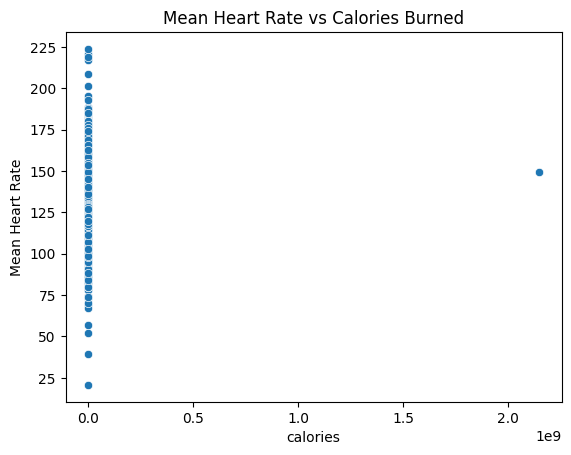

In [ ]:
valid_cals = meta_with_hr[meta_with_hr["calories"] > 10]
sns.scatterplot(valid_cals, x="calories", y="mean_hr")
plt.title("Mean Heart Rate vs Calories Burned")
plt.ylabel("Mean Heart Rate")

Our data looks super weird, but if we look at the scales closely, it's because of a single outlier value at 2e9.

Text(0, 0.5, 'Mean Heart Rate')

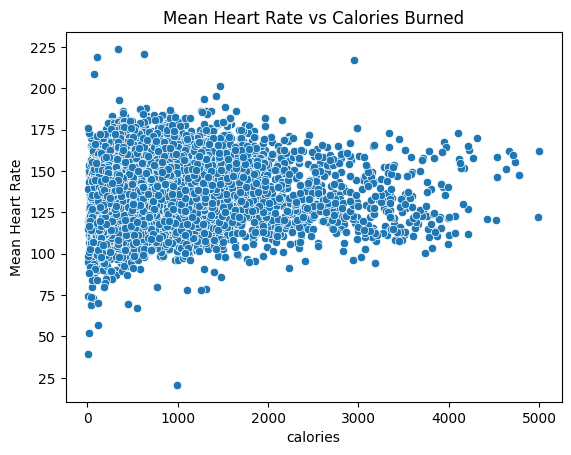

In [ ]:
valid_cals = valid_cals[valid_cals["calories"] < 5000]
sns.scatterplot(valid_cals, x="calories", y="mean_hr")
plt.title("Mean Heart Rate vs Calories Burned")
plt.ylabel("Mean Heart Rate")

There is a lot of overfitting, especially at the left side. Therefore, it seems like calories has a right skew. We can try applying some transformations.

Text(0, 0.5, 'Mean Heart Rate')

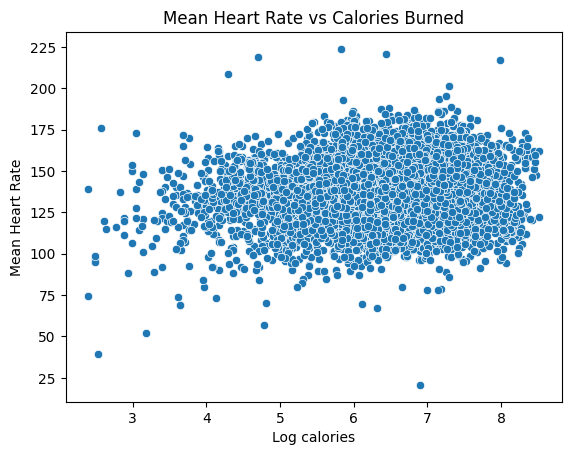

In [ ]:
sns.scatterplot(valid_cals, x=np.log(valid_cals["calories"]), y="mean_hr")
plt.title("Mean Heart Rate vs Calories Burned")
plt.xlabel("Log calories")
plt.ylabel("Mean Heart Rate")

Still a lot of overfitting, so we can try a contour plot.

Text(0, 0.5, 'Mean Heart Rate')

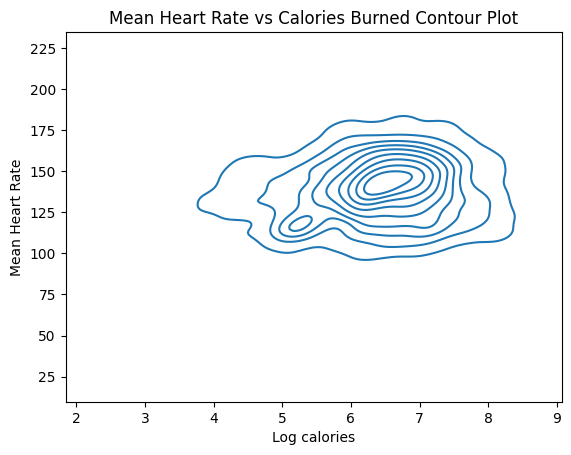

In [ ]:
sns.kdeplot(valid_cals, x=np.log(valid_cals["calories"]), y="mean_hr")
plt.title("Mean Heart Rate vs Calories Burned Contour Plot")
plt.xlabel("Log calories")
plt.ylabel("Mean Heart Rate")

In [ ]:
np.corrcoef(np.log(valid_cals["calories"]), valid_cals["mean_hr"])


array([[1.        , 0.14561259],
       [0.14561259, 1.        ]])

In [ ]:
import pandas as pd



df = pd.read_json("../data/cleaned_data.json")


df_info = df.info()
first_rows = df.head()

df_info, first_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41946 entries, 0 to 41945
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   longitude   41946 non-null  object
 1   altitude    41946 non-null  object
 2   latitude    41946 non-null  object
 3   sport       41946 non-null  object
 4   id          41946 non-null  int64 
 5   heart_rate  41946 non-null  object
 6   gender      41946 non-null  object
 7   timestamp   41946 non-null  object
 8   url         41946 non-null  object
 9   userId      41946 non-null  int64 
 10  speed       7925 non-null   object
dtypes: int64(2), object(9)
memory usage: 3.5+ MB


(None,
                                            longitude  \
 0  [24.64977040886879, 24.65014273300767, 24.6509...   
 1  [24.64979832060635, 24.64992195367813, 24.6500...   
 2  [24.64967619627714, 24.650766011327505, 24.650...   
 3  [24.64970293454826, 24.65009386651218, 24.6508...   
 4  [24.649846516549587, 24.65011683292687, 24.650...   
 
                                             altitude  \
 0  [41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....   
 1  [32.0, 32.0, 32.0, 35.8, 36.2, 36.2, 36.2, 36....   
 2  [12.2, 12.2, 10.0, 7.8, 5.6, 5.6, 5.6, 5.6, 5....   
 3  [33.6, 32.4, 32.4, 32.0, 29.2, 27.8, 27.8, 27....   
 4  [129.8, 130.0, 130.0, 130.0, 128.6, 127.8, 126...   
 
                                             latitude             sport  \
 0  [60.173348765820265, 60.173239801079035, 60.17...              bike   
 1  [60.17329327762127, 60.17327332869172, 60.1732...  bike (transport)   
 2  [60.17331792041659, 60.17307207919657, 60.1723...              bike   
 3  [

In [ ]:
import pandas as pd

data = pd.read_json("../data/cleaned_data.json")


In [ ]:
data.shape

(41946, 13)

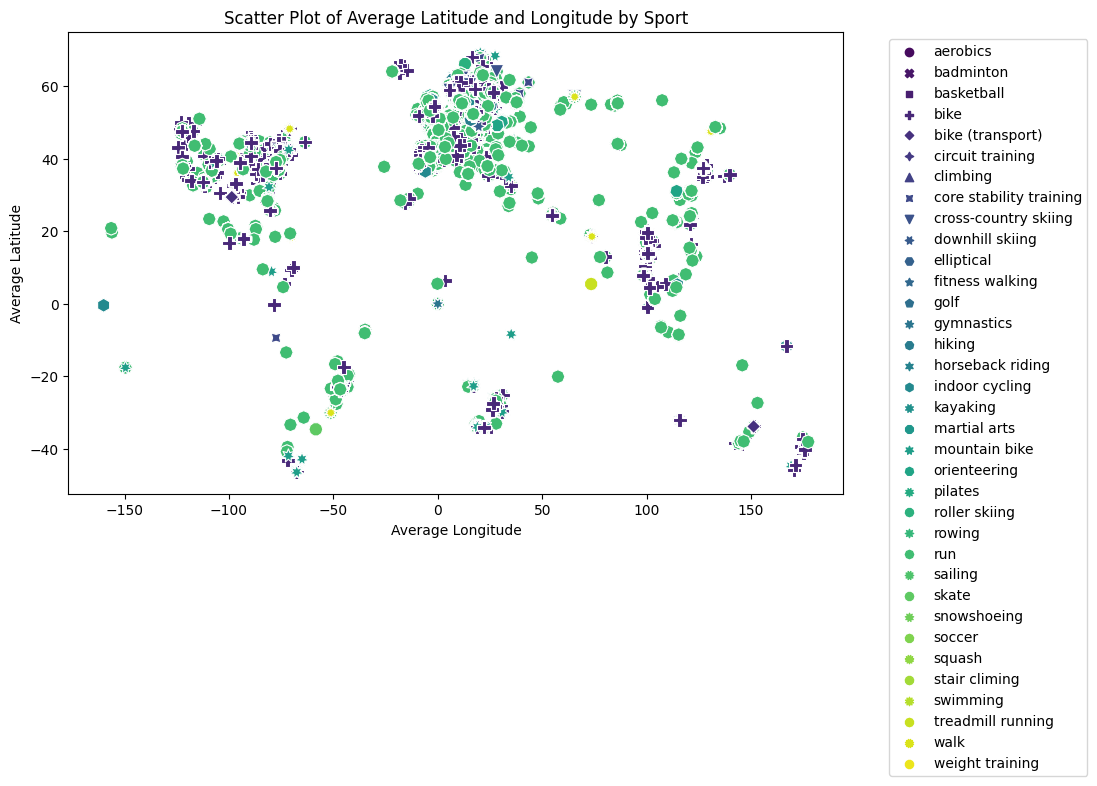

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the average latitude and longitude for each activity
data['avg_latitude'] = data['latitude'].apply(lambda x: np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan)
data['avg_longitude'] = data['longitude'].apply(lambda x: np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan)

# Create a new DataFrame with these average values and the sport type
data_reduced = data[['avg_latitude', 'avg_longitude', 'sport']].dropna()

# Convert the 'sport' column to a categorical type
data_reduced['sport'] = data_reduced['sport'].astype('category')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_longitude', y='avg_latitude', hue='sport', style='sport', s=100, data=data_reduced, palette='viridis')

# Set plot labels and title
plt.xlabel('Average Longitude')
plt.ylabel('Average Latitude')
plt.title('Scatter Plot of Average Latitude and Longitude by Sport')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<ipython-input-7-b26445987333>:10: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='avg_longitude', y='avg_latitude', data=subset, fill=True, alpha=0.5, color=colors[i], label=sport)
<ipython-input-7-b26445987333>:10: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='avg_longitude', y='avg_latitude', data=subset, fill=True, alpha=0.5, color=colors[i], label=sport)
<ipython-input-7-b26445987333>:10: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='avg_longitude', y='avg_latitude', data=subset, fill=True, alpha=0.5, color=colors[i], label=sport)
<ipython-input-7-b26445987333>:10: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplo

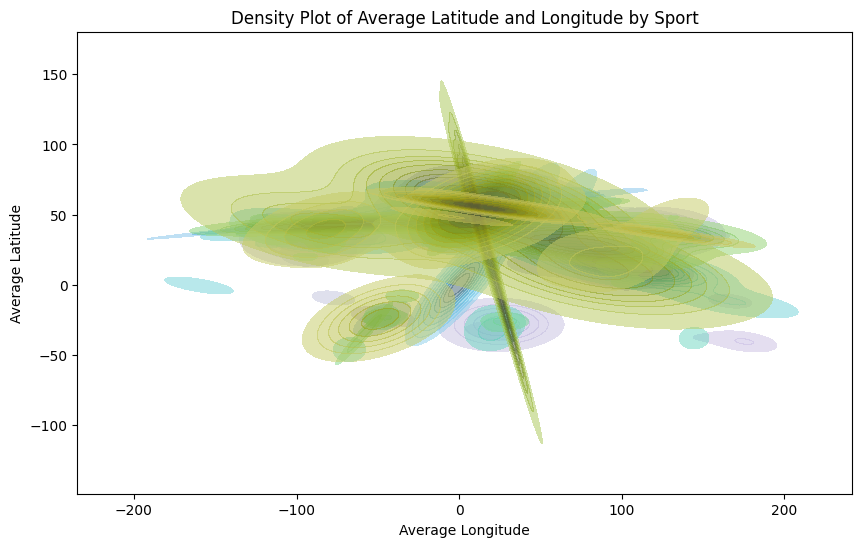

In [ ]:
plt.figure(figsize=(10, 6))


num_sports = len(data_reduced['sport'].cat.categories)
colors = sns.color_palette('viridis', n_colors=num_sports)


for i, sport in enumerate(data_reduced['sport'].cat.categories):
    subset = data_reduced[data_reduced['sport'] == sport]
    sns.kdeplot(x='avg_longitude', y='avg_latitude', data=subset, fill=True, alpha=0.5, color=colors[i], label=sport)


plt.xlabel('Average Longitude')
plt.ylabel('Average Latitude')
plt.title('Density Plot of Average Latitude and Longitude by Sport')


plt.show()


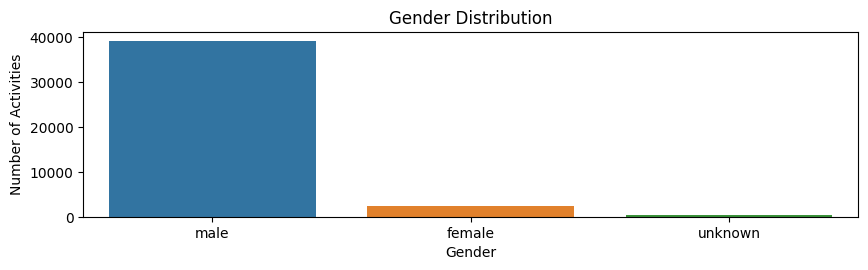

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Initialize the figure
plt.figure(figsize=(10, 6))



plt.subplot(2, 1, 2)
sns.countplot(data=df, x='gender', order = df['gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Activities')

plt.subplots_adjust(hspace=0.5)
plt.show()
